# Auckland House Prices Analysis

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read data collected from part-1-data-collection
    Bedrooms : Number of bedrooms of property
    Bathrooms : Number of bathrooms of property
    Address : Physical address of property
    Land area : land area of property in meters squared
    CV : Capital value of property. This is used to calculate payable rates, and is an APPROXIMATION of house value.
    Latitude : Latitude coordinate of property
    Longitude : Longitude coordinate of property
    SA1 : "Statistical area 1" code
    0-19 years : Number of people whose age is within 0 - 19 years old living in the SA1 unit area based on the 2018 census
    20-29 years : Number of people whose age is within 20 - 29 years old living in the SA1 unit area based on the 2018 census
    30-39 years : Number of people whose age is within 30 - 39 years old living in the SA1 unit area based on the 2018 census
    40-49 years : Number of people whose age is within 40 - 49 years old living in the SA1 unit area based on the 2018 census
    50-59 years : Number of people whose age is within 50 - 59 years old living in the SA1 unit area based on the 2018 census
    60+ years : Number of people whose age is 60 years old and above living in the SA1 unit area based on the 2018 census
    Suburbs: Name of suburb where property is located
    NZDep2018 : deprivation ordinal scale ranges from 1 to 10, where 1 represents the areas with the least deprived scores and 10 the areas with the most deprived scores
    NZDep2018_Score : deprivation interval variable, has been scaled to have mean 1000 index points and standard deviation 100 index points

In [245]:
house_prices = pd.read_csv('add-deprivation.csv', index_col=0)
house_prices

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Combined coordinates,Population,NZDep2018,NZDep2018_Score
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,"(-37.0129205, 174.90406940000003)",174,6.0,997.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,"(-37.0636724, 174.9229121)",129,1.0,881.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,"(-37.063579700000005, 174.9240444)",129,1.0,881.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,"(-36.9129964, 174.78742490000002)",120,2.0,908.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,"(-36.979036900000004, 174.8926119)",231,9.0,1091.0
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780502,7007917,63,15,24,33,30,39,Mangere Bridge,"(-36.943928899999996, 174.78050149999999)",195,4.0,942.0
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby,"(-36.849238899999996, 174.73445130000002)",102,4.0,951.0
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill,"(-36.9077, 174.7960425)",162,4.0,951.0
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa,"(-37.033322399999996, 174.89811310000002)",126,10.0,1164.0
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey,"(-36.8462083, 174.62079440000002)",141,6.0,988.0


In [246]:
house_prices.dtypes

Bedrooms                  int64
Bathrooms               float64
Address                  object
Land area                object
CV                        int64
Latitude                float64
Longitude               float64
SA1                       int64
0-19 years                int64
20-29 years               int64
30-39 years               int64
40-49 years               int64
50-59 years               int64
60+ years                 int64
Suburbs                  object
Combined coordinates     object
Population                int64
NZDep2018               float64
NZDep2018_Score         float64
dtype: object

### Land area: Extract number from string and convert it to float

In [247]:
house_prices['Land area'] = house_prices['Land area'].str.extract('(\d+)').astype(float)
house_prices.dtypes

Bedrooms                  int64
Bathrooms               float64
Address                  object
Land area               float64
CV                        int64
Latitude                float64
Longitude               float64
SA1                       int64
0-19 years                int64
20-29 years               int64
30-39 years               int64
40-49 years               int64
50-59 years               int64
60+ years                 int64
Suburbs                  object
Combined coordinates     object
Population                int64
NZDep2018               float64
NZDep2018_Score         float64
dtype: object

In [248]:
house_prices.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,NZDep2018,NZDep2018_Score
count,1051.000000,1049.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,5.063749,986.503330
std,1.169412,0.992985,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.913471,94.287255
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,849.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000,918.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000,959.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000,1031.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000,1380.000000


### Check if there are any NaN values

In [249]:
house_prices.isnull().values.any()

True

In [250]:
df1 = house_prices[house_prices.isna().any(axis=1)]
df1

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Combined coordinates,Population,NZDep2018,NZDep2018_Score
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214.0,1250000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,"(-36.798371200000005, 174.64743)",252,2.0,911.0
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245.0,1100000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,"(-36.798371200000005, 174.64743)",252,2.0,911.0
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141.0,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,"(-36.1972824, 175.4169211)",156,9.0,1122.0


In [251]:
house_prices.loc[house_prices['SA1'] == 7001131]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Combined coordinates,Population,NZDep2018,NZDep2018_Score
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141.0,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,"(-36.1972824, 175.4169211)",156,9.0,1122.0
569,5,3.0,"349 Blind Bay Road Great Barrier Island, Auckland",3953.0,920000,-36.257895,175.436448,7001131,27,6,6,18,39,60,Great Barrier Island (Aotea Island),"(-36.25789520000001, 175.4364476)",156,9.0,1122.0


### One record with NaN Suburb, retrieve the Suburb from another record in the same SA1 and fill it in

In [252]:
house_prices.loc[568, 'Suburbs'] = 'Great Barrier Island (Aotea Island)'
house_prices.loc[house_prices['SA1'] == 7001131]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Combined coordinates,Population,NZDep2018,NZDep2018_Score
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141.0,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,Great Barrier Island (Aotea Island),"(-36.1972824, 175.4169211)",156,9.0,1122.0
569,5,3.0,"349 Blind Bay Road Great Barrier Island, Auckland",3953.0,920000,-36.257895,175.436448,7001131,27,6,6,18,39,60,Great Barrier Island (Aotea Island),"(-36.25789520000001, 175.4364476)",156,9.0,1122.0


### Two records with NaN number of Bathrooms, drop them

In [253]:
house_prices = house_prices.dropna()
house_prices.isnull().values.any()

False

### Data exploration - individual variables

In [254]:
house_prices['Bedrooms'].unique()

array([ 5,  6,  2,  3,  4,  9,  7,  1,  8, 17])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


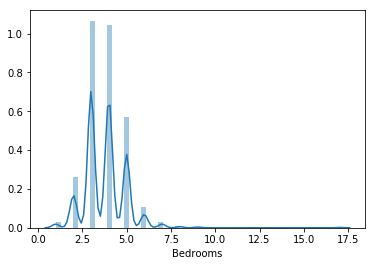

In [255]:
sns.distplot(house_prices['Bedrooms'])

### Remove outliers

In [256]:
house_prices = house_prices.loc[house_prices['Bedrooms'] < 8]

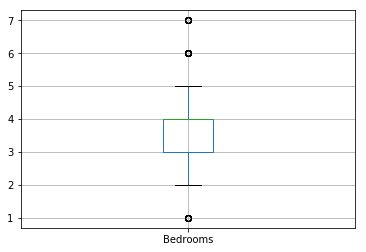

In [257]:
house_prices.boxplot(column='Bedrooms')

In [258]:
house_prices['Bathrooms'].unique()

array([3., 4., 1., 2., 5., 6., 7.])

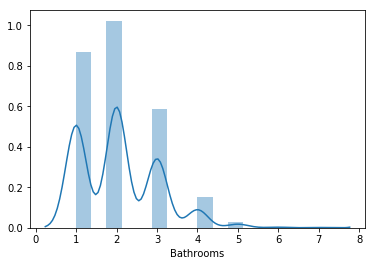

In [259]:
sns.distplot(house_prices['Bathrooms'])

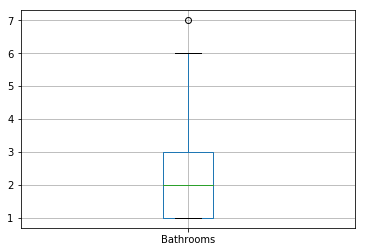

In [260]:
house_prices.boxplot(column='Bathrooms')

### Remove outliers

In [261]:
house_prices = house_prices.loc[house_prices['Bathrooms'] < 7]

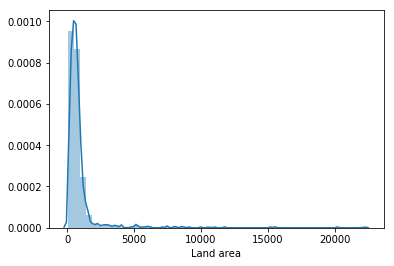

In [262]:
sns.distplot(house_prices['Land area'])

### Land area is skewed, transform it with logarithm

In [301]:
house_prices['LogArea'] = np.log(house_prices['Land area'])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


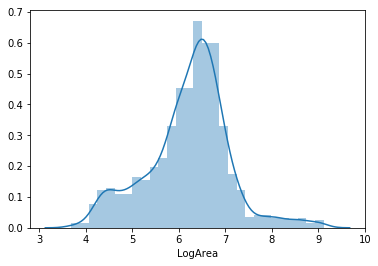

In [302]:
sns.distplot(house_prices['LogArea'])

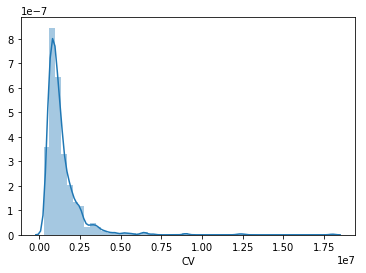

In [266]:
sns.distplot(house_prices['CV'])

### CV is skewed, transform it with logarithm

In [267]:
house_prices['logCV'] = np.log(house_prices['CV'])

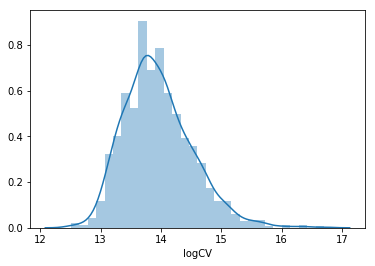

In [347]:
sns.distplot(house_prices['logCV'])

### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bd4bd1d0>,
      dtype=object)

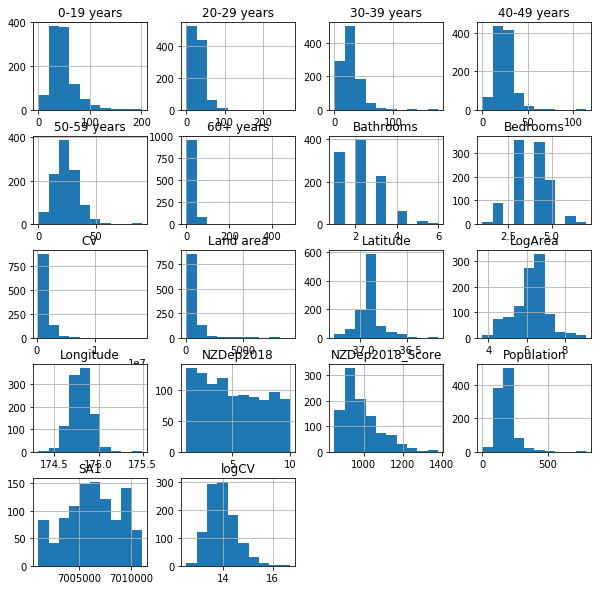

In [303]:
house_prices.hist(figsize=(10,10))

### Correlations

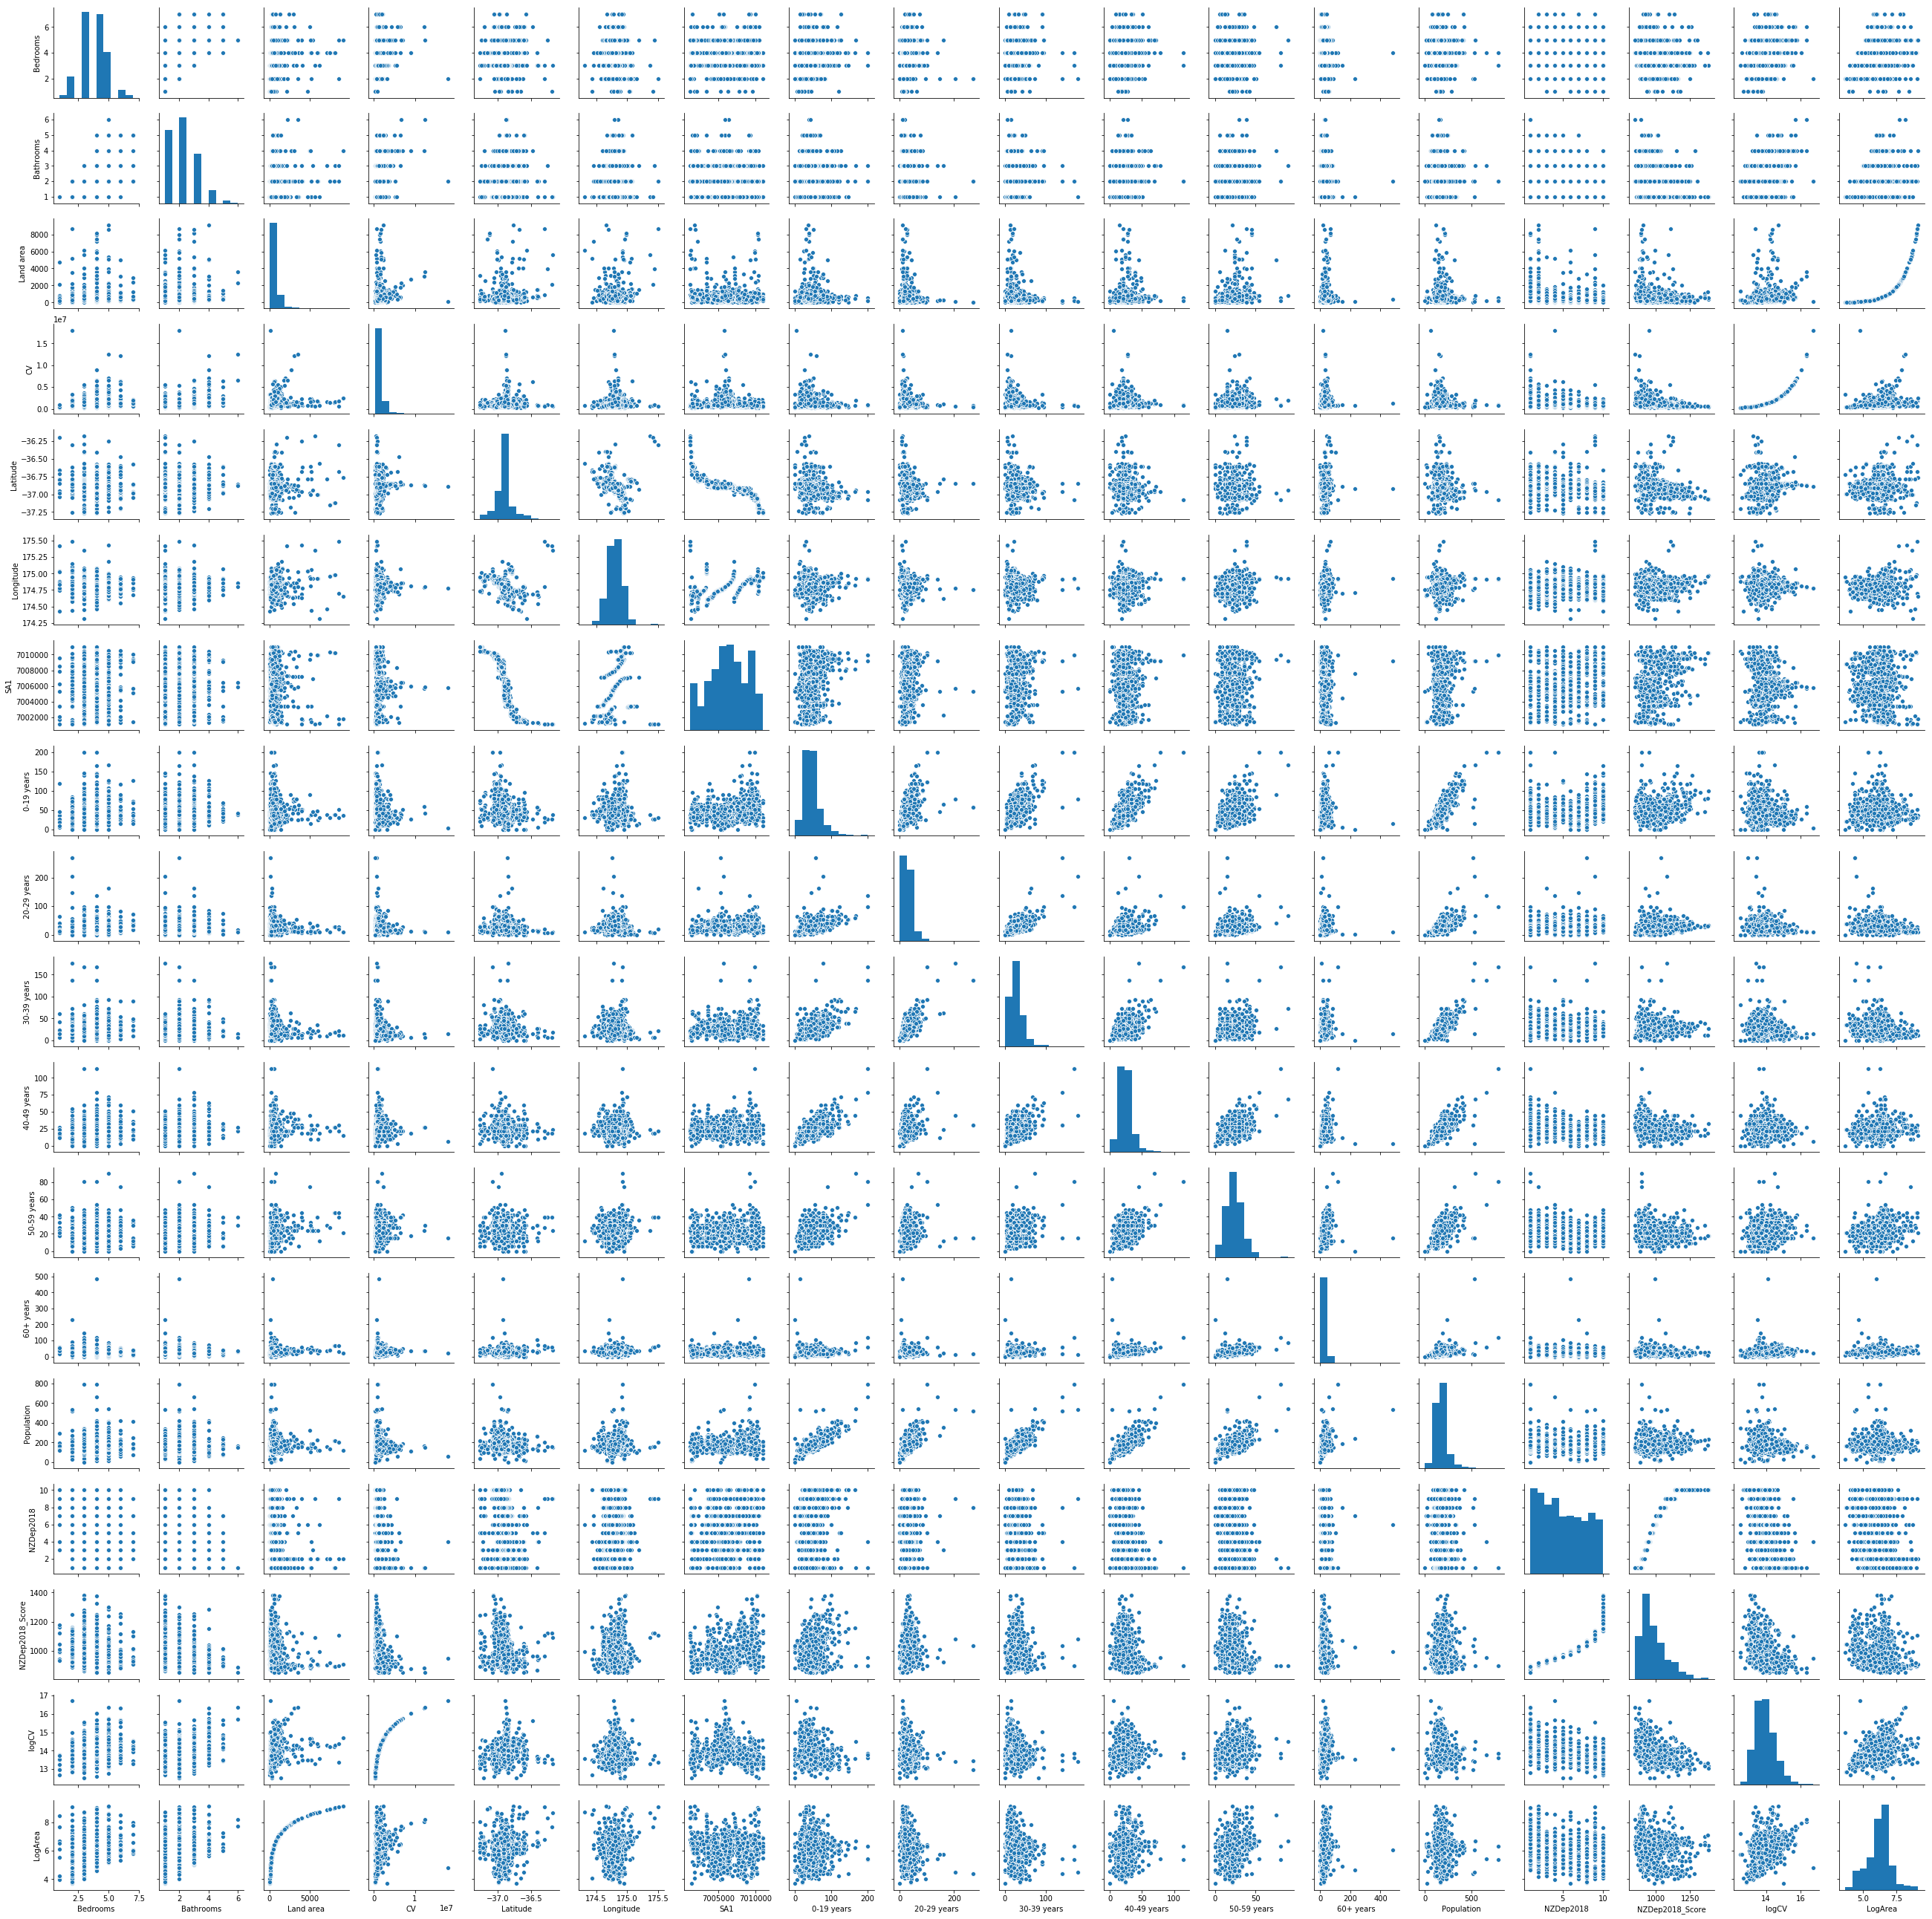

In [304]:
sns.pairplot(house_prices, height=2.0)

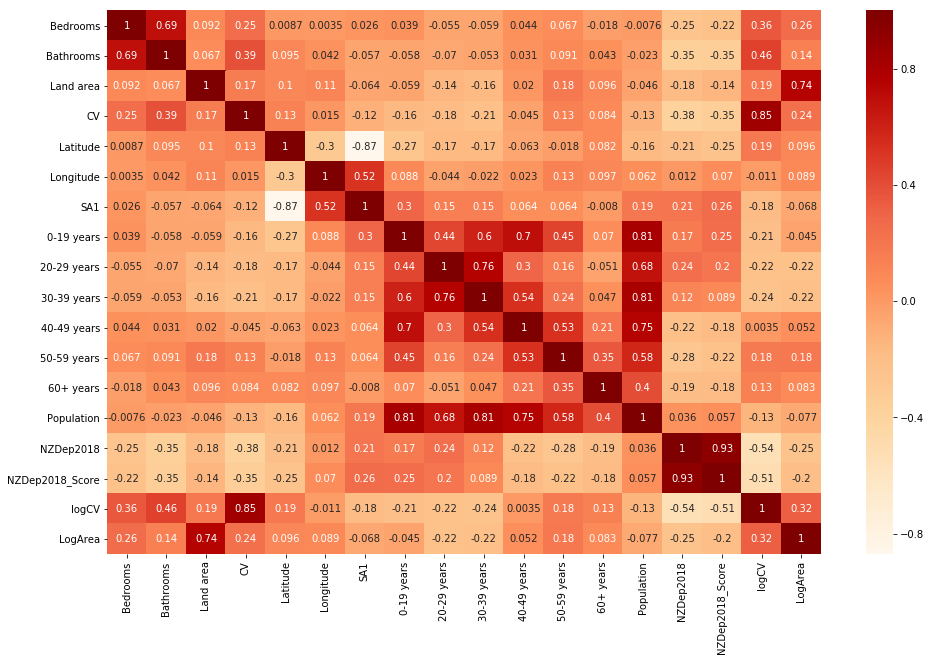

In [305]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = house_prices.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

### Regression model

In [306]:
from sklearn.model_selection import train_test_split

In [337]:
#x = house_prices.drop(['CV', 'logCV', 'Land area', 'Address', 'Latitude', 'Longitude', 'SA1', 'Suburbs', 'Combined coordinates', 'NZDep2018'], axis=1)
x = house_prices.filter(['logArea', 'Bedrooms', 'Bathrooms'])
x.head()

,Bedrooms,Bathrooms
0,5,3.0
1,5,3.0
2,6,4.0
3,2,1.0
4,3,1.0


In [338]:
y = house_prices['logCV']
y.head()

0    13.774689
1    14.038654
2    14.038654
3    13.514405
4    13.353475
Name: logCV, dtype: float64

In [339]:
train_x, test_x, train_y, test_y = train_test_split(x, y)

In [340]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [341]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [342]:
model.coef_

array([0.0659445 , 0.22401934])

In [343]:
predicted = model.predict(test_x)
predicted

array([13.89506908, 14.47499676, 13.67104975, 14.18503292, 13.67104975,
       14.18503292, 13.96101359, 13.89506908, 13.67104975, 13.67104975,
       13.89506908, 13.89506908, 13.67104975, 13.89506908, 14.18503292,
       13.60510525, 13.67104975, 14.25097742, 13.96101359, 13.67104975,
       13.60510525, 13.96101359, 13.67104975, 14.60688576, 14.25097742,
       13.96101359, 14.25097742, 14.7649606 , 14.40905226, 14.25097742,
       13.67104975, 14.47499676, 14.25097742, 14.25097742, 14.09290259,
       13.67104975, 13.96101359, 14.31692192, 13.67104975, 13.96101359,
       14.25097742, 14.25097742, 14.40905226, 13.67104975, 13.67104975,
       13.73699425, 13.67104975, 13.89506908, 13.96101359, 13.73699425,
       13.89506908, 13.89506908, 13.67104975, 14.18503292, 13.67104975,
       13.96101359, 14.25097742, 13.73699425, 14.18503292, 13.67104975,
       13.73699425, 13.96101359, 14.25097742, 14.25097742, 13.96101359,
       13.96101359, 14.18503292, 13.89506908, 14.18503292, 13.96

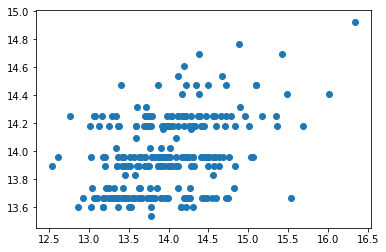

In [344]:
plt.scatter(test_y, predicted)

In [345]:
model.score(test_x, test_y)

0.16938753744288682